In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(
    context="paper",
    style="whitegrid",
    rc={
        "figure.figsize": (3.5, 3.5),
        "figure.dpi": 150,
        "savefig.dpi": 300,
        "figure.constrained_layout.use": True,
    },
)


In [12]:
df_cnn = pd.read_csv("../data/out/generalization/e7ivqipk.csv")
df_cnn["filter"] = "cnn"
df_lmb = pd.read_csv("../data/out/lmb_summary.csv")
df_glmb = pd.read_csv("../data/out/glmb_summary.csv")
df_combined = pd.concat([df_cnn, df_lmb, df_glmb])


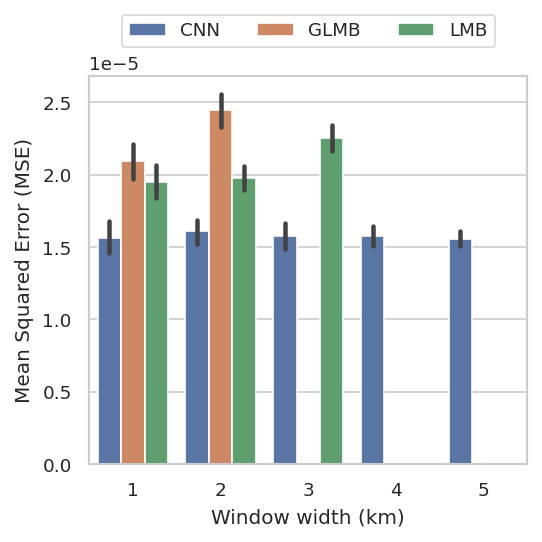

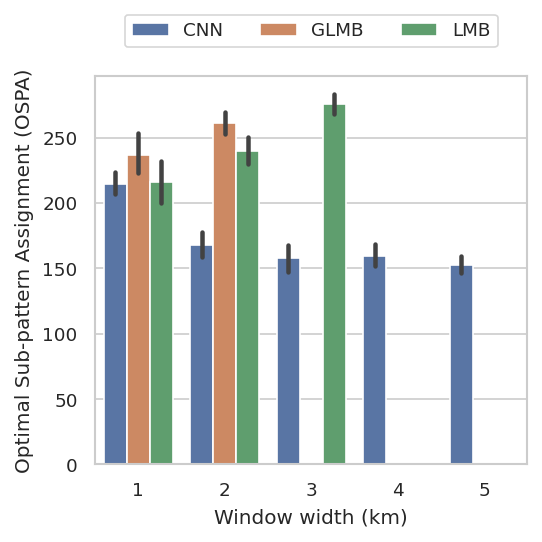

In [13]:
data = (
    df_combined.groupby(["filter", "scale", "simulation_idx"], as_index=False)
    .mean()
    .replace({"cnn": "CNN", "lmb": "LMB", "glmb": "GLMB"})
)

plt.figure()
sns.barplot(data=data, x="scale", y="mse", hue="filter", errorbar="ci")
plt.legend(loc="lower center", bbox_to_anchor=(0.5, 1.05), ncol=3, title=None)
plt.ylabel("Mean Squared Error (MSE)")
plt.xlabel("Window width (km)")
plt.savefig("../figures/mse.pdf")
plt.show()

plt.figure()
sns.barplot(data=data, x="scale", y="ospa", hue="filter", errorbar="ci")
plt.legend(loc="lower center", bbox_to_anchor=(0.5, 1.05), ncol=3, title=None)
plt.ylabel("Optimal Sub-pattern Assignment (OSPA)")
plt.xlabel("Window width (km)")
plt.savefig("../figures/ospa.pdf")
plt.show()
